# **A. Tiền xử lý dữ liệu**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_df = pd.read_csv("../../../Data/number_of_deaths_raw_data.csv")
raw_df.head(10)

,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Other Group 1 (postneonatal only),Congenital anomalies,Other noncommunicable diseases (postneonatal only),Injuries,Tuberculosis,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Pertussis,Tetanus,Measles,Meningitis/encephalitis,Malaria,Acute lower respiratory infections,CountryName,Year
0,19333.41926,11691.37210,4489.50404,NaN,1534.08344,NaN,371.28902,0.0,10579.92644,0.22891,1973.08786,NaN,2331.69796,0.0,1395.33839,0.0,6908.05259,Afghanistan,2000
1,14761.72219,10042.87869,2977.92908,NaN,1405.50824,NaN,130.32201,0.0,3849.14708,30.31433,724.01316,NaN,768.57928,0.0,357.27433,0.0,4267.31161,Angola,2000
2,351.16760,110.05251,17.54192,NaN,106.22332,NaN,4.31283,0.0,30.48989,0.00347,0.77210,NaN,0.09764,0.0,10.36631,0.0,36.97242,Albania,2000
3,3.00000,0.00000,0.00000,NaN,0.00000,NaN,0.00000,0.0,0.00000,0.00000,0.00000,NaN,0.00000,0.0,0.00000,0.0,0.00000,Andorra,2000
4,137.90854,26.85080,2.86905,NaN,75.66284,NaN,1.78464,0.0,66.57905,0.10435,0.00000,NaN,0.00000,0.0,0.15043,0.0,0.09029,United Arab Emirates,2000
5,3662.78364,799.63672,846.48628,NaN,1800.51370,NaN,102.21722,0.0,559.00042,1.06476,0.00000,NaN,0.00000,0.0,22.36002,0.0,146.93724,Argentina,2000
6,294.41638,124.54276,32.03906,NaN,90.42745,NaN,1.84814,0.0,55.49606,0.00261,2.10067,NaN,0.33695,0.0,0.22528,0.0,40.56464,Armenia,2000
7,2.00000,8.00000,0.00000,NaN,4.00000,NaN,0.00000,0.0,0.00000,0.00000,0.00000,NaN,0.00000,0.0,0.00000,0.0,0.00000,Antigua and Barbuda,2000
8,205.09423,141.19553,38.13310,NaN,270.02355,NaN,6.18375,0.0,207.15548,0.00000,0.00000,NaN,0.00000,0.0,2.06125,0.0,5.15312,Australia,2000
9,92.16000,23.04000,5.76000,NaN,89.28000,NaN,5.76000,0.0,21.12000,0.00000,0.00000,NaN,0.00000,0.0,0.00000,0.0,2.88000,Austria,2000


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4268 entries, 0 to 4267
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Prematurity                                                          4268 non-null   float64
 1   Birth asphyxia and birth trauma                                      4268 non-null   float64
 2   Sepsis and other infectious conditions of the newborn                4268 non-null   float64
 3   Other Group 1 (postneonatal only)                                    0 non-null      float64
 4   Congenital anomalies                                                 4268 non-null   float64
 5   Other noncommunicable diseases (postneonatal only)                   0 non-null      float64
 6   Injuries                                                             4268 non-null   float64
 7   Tuberc

Đây là dữ liệu thô chưa được xử lý, ta sẽ làm sạch nó bằng các kĩ thuật:
  + Kiểm tra shape của dữ liệu
  + Kiểm tra dữ liệu trùng lặp
  + Kiểm tra kiểu của dữ liệu
  + Kiểm tra dữ liệu bị thiếu và cách loại bỏ
  + Kiểm tra dữ liệu không đóng góp vào mô hình
  + Kiểm tra tính hợp lý (reasonable) của dữ liệu
  + Kĩ thuật đặc trưng

## 1. Kiểm tra shape của dữ liệu

In [4]:
shape = raw_df.shape
print(f"Shape của dữ liệu: {shape}")

# Kiểm tra dữ liệu có ít nhất 5 thuộc tính và 1000 quan sát
if shape[0] > 1000 and shape[1] > 5:
    print(f"Đây là dữ liệu tốt.")
else:
    print(f"Dữ liệu còn hơi nhỏ. Hãy mở rộng dữ liệu.!")


Shape của dữ liệu: (4268, 19)
Đây là dữ liệu tốt.


## 2. Kiểm tra dữ liệu trùng lặp

In [5]:
num_duplicated_rows = raw_df.duplicated().sum()
num_duplicated_rows

if num_duplicated_rows == 0:
    print(f"Dữ liệu không có dòng trùng lặp.!")
else:
    print(f"Dữ liệu có {num_duplicated_rows} dòng trùng lặp. Hãy loại bỏ trùng lặp trong dữ liệu.!")

Dữ liệu không có dòng trùng lặp.!


## 3. Kiểm tra kiểu của dữ liệu

In [6]:
raw_df.dtypes

Prematurity                                                            float64
Birth asphyxia and birth trauma                                        float64
Sepsis and other infectious conditions of the newborn                  float64
Other Group 1 (postneonatal only)                                      float64
Congenital anomalies                                                   float64
Other noncommunicable diseases (postneonatal only)                     float64
Injuries                                                               float64
Tuberculosis                                                           float64
Other Group 1 and Other noncommunicable (neonatal and under-5 only)    float64
HIV/AIDS                                                               float64
Diarrhoeal diseases                                                    float64
Pertussis                                                              float64
Tetanus                                             

Theo quan sát trên, ta thấy:
  + Các cột số lượng ca tử vong theo nguyên nhân có kiểu dữ liệu `Numerical`, cụ thể là `float64`
  + Cột CountryName có kiểu dữ liệu `Categorical`, cụ thể là `object`
  + Cột Year có kiểu dữ liệu `Numerical`, cụ thể là `int64`

Nhận xét:
  + Phương pháp đo lường số lượng ca tử vong có dựa trên nghiên cứu khám nghiệm tử thi để phân tích nguyên nhân tử vong. Kết quả khám nghiệm tử thi có thể không khẳng định được hoàn toàn rằng ca tử vong được gây ra bởi 1 nguyên nhân tử vong duy nhất nên dữ liệu các cột nguyên nhân tử vong sẽ có kiểu `float64`
  + Độ lớn của giá trị trong cột `Year` không có ý nghĩa gì. Nó đại diện cho một khoảng thời gian thay vì một con số. Vì vậy, ta có thể chuyển đổi cột `Year` thành kiểu  `Categorical`, cụ thể là `str`

In [7]:
raw_df["Year"] = raw_df["Year"].astype('str')
raw_df["Year"]

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
4263    2021
4264    2021
4265    2021
4266    2021
4267    2021
Name: Year, Length: 4268, dtype: object

In [8]:
# Kiểm tra kiểu dữ liệu sau khi xử lý
dtypes = raw_df.dtypes

# Số cột kiểu numerical (float32, float64) = số cột nguyên nhân tử vong = 17
float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert len(float_cols) == 17

# Số cột kiểu categorical = số cột kiểu object = cột CountryName (object) + cột Year (str) = 2
# Kiểu str cũng coi như là kiểu object
cate_cols, object_cols = set(dtypes[dtypes == pd.Categorical].index), set(dtypes[dtypes == object].index)
assert (len(cate_cols) == 2 and len(object_cols) == 2)

dtypes

Prematurity                                                            float64
Birth asphyxia and birth trauma                                        float64
Sepsis and other infectious conditions of the newborn                  float64
Other Group 1 (postneonatal only)                                      float64
Congenital anomalies                                                   float64
Other noncommunicable diseases (postneonatal only)                     float64
Injuries                                                               float64
Tuberculosis                                                           float64
Other Group 1 and Other noncommunicable (neonatal and under-5 only)    float64
HIV/AIDS                                                               float64
Diarrhoeal diseases                                                    float64
Pertussis                                                              float64
Tetanus                                             

## 4. Kiểm tra dữ liệu bị thiếu

In [9]:
# Lấy ra tỉ lệ dữ liệu NaN ở các cột
missing_ratio_series = raw_df.isna().mean() * 100
missing_ratio_series

Prematurity                                                              0.0
Birth asphyxia and birth trauma                                          0.0
Sepsis and other infectious conditions of the newborn                    0.0
Other Group 1 (postneonatal only)                                      100.0
Congenital anomalies                                                     0.0
Other noncommunicable diseases (postneonatal only)                     100.0
Injuries                                                                 0.0
Tuberculosis                                                             0.0
Other Group 1 and Other noncommunicable (neonatal and under-5 only)      0.0
HIV/AIDS                                                                 0.0
Diarrhoeal diseases                                                      0.0
Pertussis                                                              100.0
Tetanus                                                                  0.0

Theo quan sát, ta thấy có 3 cột hoàn toàn không có dữ liệu về số ca tử vong (tỉ lệ giá trị NaN là 100%). Vì vậy ta sẽ loại bỏ 3 cột đó ra khỏi dữ liệu

In [10]:
# Đặt ngưỡng cho dữ liệu bị thiếu là 70%
threshold = 70

# Lấy ra các cột có tỉ lệ dữ liệu bị thiếu lớn hơn ngưỡng cho trước
high_missing_ratio_columns = missing_ratio_series[missing_ratio_series > threshold]
high_missing_ratio_columns

Other Group 1 (postneonatal only)                     100.0
Other noncommunicable diseases (postneonatal only)    100.0
Pertussis                                             100.0
dtype: float64

In [11]:
# Xoá các cột có tỉ lệ thiếu dữ liệu vượt ngưỡng
raw_df = raw_df.drop(columns=high_missing_ratio_columns.index)
raw_df

,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Congenital anomalies,Injuries,Tuberculosis,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Tetanus,Measles,Meningitis/encephalitis,Malaria,Acute lower respiratory infections,CountryName,Year
0,19333.41926,11691.37210,4489.50404,1534.08344,371.28902,0.0,10579.92644,0.22891,1973.08786,2331.69796,0.0,1395.33839,0.0,6908.05259,Afghanistan,2000
1,14761.72219,10042.87869,2977.92908,1405.50824,130.32201,0.0,3849.14708,30.31433,724.01316,768.57928,0.0,357.27433,0.0,4267.31161,Angola,2000
2,351.16760,110.05251,17.54192,106.22332,4.31283,0.0,30.48989,0.00347,0.77210,0.09764,0.0,10.36631,0.0,36.97242,Albania,2000
3,3.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,Andorra,2000
4,137.90854,26.85080,2.86905,75.66284,1.78464,0.0,66.57905,0.10435,0.00000,0.00000,0.0,0.15043,0.0,0.09029,United Arab Emirates,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,17.45855,5.56010,2.93639,7.28102,0.25978,0.0,4.18806,0.00000,0.00000,0.00000,0.0,0.15554,0.0,1.16055,Samoa,2021
4264,11286.37393,6796.63328,1742.58956,2227.89226,229.08594,0.0,3051.97336,0.90444,521.35998,129.94279,0.0,44.07145,0.0,2523.17301,Yemen,2021
4265,4634.07215,2595.54661,1828.98610,1315.87236,166.21530,0.0,1708.85383,36.14888,0.00000,0.00000,0.0,16.01934,0.0,677.28544,South Africa,2021
4266,6920.62510,4054.12780,912.70245,1274.53105,35.09944,0.0,1776.66284,22.93804,134.08604,23.52546,0.0,108.91078,0.0,1228.79101,Zambia,2021


Giờ dữ liệu chỉ còn lại 16 cột (3 cột nguyên nhân tử vong thiếu dữ liệu đã bị xoá)

## 5. Kiểm tra các cột dữ liệu không đóng góp vào mô hình



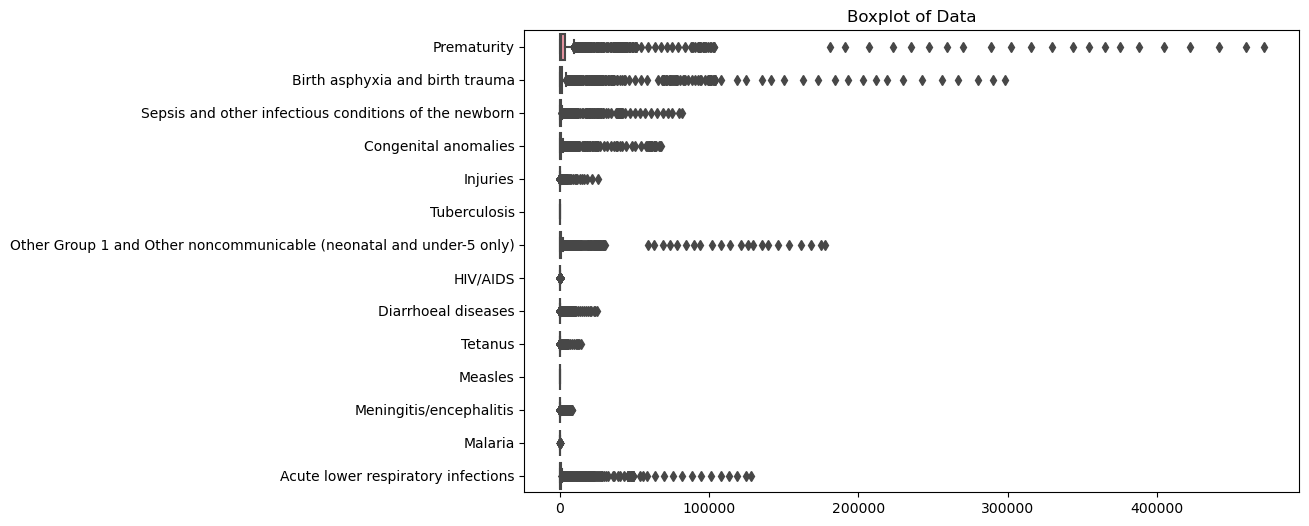

In [12]:
# Vẽ boxplot cho từng cột có dữ liệu số trong raw_df
plt.figure(figsize=(10, 6))
sn.boxplot(data=raw_df, orient="h")
plt.title("Boxplot of Data")
plt.show()

Theo quan sát, ta thấy các cột Tuberculosis, Measles có số ca tử vong gần như bằng 0, tức là nguyên nhân tử vong ở trẻ em hầu hết không đến từ các nguyên nhân này. Vì vậy những nguyên nhân này không đóng góp nhiều vào bài toán

In [13]:
# Lấy ra các cột kiểu numerical
num_col_info_df = raw_df.select_dtypes(exclude='object')
num_col_info_df

,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Congenital anomalies,Injuries,Tuberculosis,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Tetanus,Measles,Meningitis/encephalitis,Malaria,Acute lower respiratory infections
0,19333.41926,11691.37210,4489.50404,1534.08344,371.28902,0.0,10579.92644,0.22891,1973.08786,2331.69796,0.0,1395.33839,0.0,6908.05259
1,14761.72219,10042.87869,2977.92908,1405.50824,130.32201,0.0,3849.14708,30.31433,724.01316,768.57928,0.0,357.27433,0.0,4267.31161
2,351.16760,110.05251,17.54192,106.22332,4.31283,0.0,30.48989,0.00347,0.77210,0.09764,0.0,10.36631,0.0,36.97242
3,3.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000
4,137.90854,26.85080,2.86905,75.66284,1.78464,0.0,66.57905,0.10435,0.00000,0.00000,0.0,0.15043,0.0,0.09029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,17.45855,5.56010,2.93639,7.28102,0.25978,0.0,4.18806,0.00000,0.00000,0.00000,0.0,0.15554,0.0,1.16055
4264,11286.37393,6796.63328,1742.58956,2227.89226,229.08594,0.0,3051.97336,0.90444,521.35998,129.94279,0.0,44.07145,0.0,2523.17301
4265,4634.07215,2595.54661,1828.98610,1315.87236,166.21530,0.0,1708.85383,36.14888,0.00000,0.00000,0.0,16.01934,0.0,677.28544
4266,6920.62510,4054.12780,912.70245,1274.53105,35.09944,0.0,1776.66284,22.93804,134.08604,23.52546,0.0,108.91078,0.0,1228.79101


In [14]:
# Lấy ra tỉ lệ dữ liệu 0 ở các cột
zero_ratio = (num_col_info_df == 0).sum() / len(num_col_info_df)
zero_ratio

Prematurity                                                            0.008435
Birth asphyxia and birth trauma                                        0.018510
Sepsis and other infectious conditions of the newborn                  0.031162
Congenital anomalies                                                   0.016870
Injuries                                                               0.118791
Tuberculosis                                                           1.000000
Other Group 1 and Other noncommunicable (neonatal and under-5 only)    0.031162
HIV/AIDS                                                               0.406514
Diarrhoeal diseases                                                    0.518978
Tetanus                                                                0.475398
Measles                                                                1.000000
Meningitis/encephalitis                                                0.301781
Malaria                                 

In [15]:
# Đặt ngưỡng cho dữ liệu có tỉ lệ giá trị 0
threshold = 0.95

# Lấy ra các cột hầu như không gây ra tử vong ở trẻ em dưới 5 tuổi, tỉ lệ giá trị 0 vượt ngưỡng 0.95
high_zero_ratio_columns = zero_ratio[zero_ratio > threshold]
high_zero_ratio_columns

Tuberculosis    1.000000
Measles         1.000000
Malaria         0.992737
dtype: float64

In [16]:
# Xoá các cột hầu như không gây ra tử vong ở trẻ em dưới 5 tuổi
raw_df = raw_df.drop(columns = high_zero_ratio_columns.index)
raw_df

,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Congenital anomalies,Injuries,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Tetanus,Meningitis/encephalitis,Acute lower respiratory infections,CountryName,Year
0,19333.41926,11691.37210,4489.50404,1534.08344,371.28902,10579.92644,0.22891,1973.08786,2331.69796,1395.33839,6908.05259,Afghanistan,2000
1,14761.72219,10042.87869,2977.92908,1405.50824,130.32201,3849.14708,30.31433,724.01316,768.57928,357.27433,4267.31161,Angola,2000
2,351.16760,110.05251,17.54192,106.22332,4.31283,30.48989,0.00347,0.77210,0.09764,10.36631,36.97242,Albania,2000
3,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,Andorra,2000
4,137.90854,26.85080,2.86905,75.66284,1.78464,66.57905,0.10435,0.00000,0.00000,0.15043,0.09029,United Arab Emirates,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,17.45855,5.56010,2.93639,7.28102,0.25978,4.18806,0.00000,0.00000,0.00000,0.15554,1.16055,Samoa,2021
4264,11286.37393,6796.63328,1742.58956,2227.89226,229.08594,3051.97336,0.90444,521.35998,129.94279,44.07145,2523.17301,Yemen,2021
4265,4634.07215,2595.54661,1828.98610,1315.87236,166.21530,1708.85383,36.14888,0.00000,0.00000,16.01934,677.28544,South Africa,2021
4266,6920.62510,4054.12780,912.70245,1274.53105,35.09944,1776.66284,22.93804,134.08604,23.52546,108.91078,1228.79101,Zambia,2021


Giờ dữ liệu chỉ còn lại 13 cột (3 cột nguyên nhân tử vong hầu như không gây ra tử vong ở trẻ em dưới 5 tuổi đã bị xoá)

## 6. Kiểm tra tính hợp lý  (reasonable) của dữ liệu:

In [17]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4268 entries, 0 to 4267
Data columns (total 13 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Prematurity                                                          4268 non-null   float64
 1   Birth asphyxia and birth trauma                                      4268 non-null   float64
 2   Sepsis and other infectious conditions of the newborn                4268 non-null   float64
 3   Congenital anomalies                                                 4268 non-null   float64
 4   Injuries                                                             4268 non-null   float64
 5   Other Group 1 and Other noncommunicable (neonatal and under-5 only)  4268 non-null   float64
 6   HIV/AIDS                                                             4268 non-null   float64
 7   Diarrh

In [18]:
# Kiểm tra số ca tử vong phải là số âm
# Vì sao giá trị của số ca tử vong có thể là số thập phân đã được giải thích ở trên nên không cần kiểm tra là số nguyên
def checking_exist_negative_number(df: pd.DataFrame) -> bool:
    # Chỉ kiểm tra các cột có dữ liệu numerical
    num_col_info_df = raw_df.select_dtypes(exclude='object')
    for col in num_col_info_df.columns:
        if (df[col] < 0).any(): return False

    return True

# Kiểm tra
checking_exist_negative_number(raw_df) == True

True

Dữ liệu số ca tử vong bởi các nguyên nhân không tồn tại số âm => Hợp lý

## 7. Kỹ thuật đặc trưng

### Đặc trưng cho dữ liệu numerical

In [19]:
# Tạo đặc trưng mới bằng tổng các đặc trưng số
# TotalDeaths = tổng số cả tử vong bởi tất cả các nguyên nhân
num_col_info_df = raw_df.select_dtypes(exclude='object')
num_col_info_df['Total Deaths'] = num_col_info_df.sum(axis=1)
num_col_info_df = num_col_info_df.round(2)
num_col_info_df

,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Congenital anomalies,Injuries,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Tetanus,Meningitis/encephalitis,Acute lower respiratory infections,Total Deaths
0,19333.42,11691.37,4489.50,1534.08,371.29,10579.93,0.23,1973.09,2331.70,1395.34,6908.05,60608.0
1,14761.72,10042.88,2977.93,1405.51,130.32,3849.15,30.31,724.01,768.58,357.27,4267.31,39315.0
2,351.17,110.05,17.54,106.22,4.31,30.49,0.00,0.77,0.10,10.37,36.97,668.0
3,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0
4,137.91,26.85,2.87,75.66,1.78,66.58,0.10,0.00,0.00,0.15,0.09,312.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4263,17.46,5.56,2.94,7.28,0.26,4.19,0.00,0.00,0.00,0.16,1.16,39.0
4264,11286.37,6796.63,1742.59,2227.89,229.09,3051.97,0.90,521.36,129.94,44.07,2523.17,28554.0
4265,4634.07,2595.55,1828.99,1315.87,166.22,1708.85,36.15,0.00,0.00,16.02,677.29,12979.0
4266,6920.63,4054.13,912.70,1274.53,35.10,1776.66,22.94,134.09,23.53,108.91,1228.79,16492.0


In [20]:
cat_col_info_df = raw_df.select_dtypes(include='object')
cat_col_info_df

,CountryName,Year
0,Afghanistan,2000
1,Angola,2000
2,Albania,2000
3,Andorra,2000
4,United Arab Emirates,2000
...,...,...
4263,Samoa,2021
4264,Yemen,2021
4265,South Africa,2021
4266,Zambia,2021


In [21]:
# Lưu DataFrame đã xử lý vào file csv
processed_df = pd.concat([num_col_info_df, cat_col_info_df], axis=1)
processed_df.to_csv("../../../Data/number_of_deaths_processed_data.csv", index=False)
processed_df

,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Congenital anomalies,Injuries,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Tetanus,Meningitis/encephalitis,Acute lower respiratory infections,Total Deaths,CountryName,Year
0,19333.42,11691.37,4489.50,1534.08,371.29,10579.93,0.23,1973.09,2331.70,1395.34,6908.05,60608.0,Afghanistan,2000
1,14761.72,10042.88,2977.93,1405.51,130.32,3849.15,30.31,724.01,768.58,357.27,4267.31,39315.0,Angola,2000
2,351.17,110.05,17.54,106.22,4.31,30.49,0.00,0.77,0.10,10.37,36.97,668.0,Albania,2000
3,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,Andorra,2000
4,137.91,26.85,2.87,75.66,1.78,66.58,0.10,0.00,0.00,0.15,0.09,312.0,United Arab Emirates,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,17.46,5.56,2.94,7.28,0.26,4.19,0.00,0.00,0.00,0.16,1.16,39.0,Samoa,2021
4264,11286.37,6796.63,1742.59,2227.89,229.09,3051.97,0.90,521.36,129.94,44.07,2523.17,28554.0,Yemen,2021
4265,4634.07,2595.55,1828.99,1315.87,166.22,1708.85,36.15,0.00,0.00,16.02,677.29,12979.0,South Africa,2021
4266,6920.63,4054.13,912.70,1274.53,35.10,1776.66,22.94,134.09,23.53,108.91,1228.79,16492.0,Zambia,2021


# **B. Khám phá dữ liệu (EDA)**

In [22]:
# Đọc dữ liệu đã được xử lý từ file csv
cleaned_df = pd.read_csv("../../../Data/number_of_deaths_processed_data.csv")
cleaned_df

,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Congenital anomalies,Injuries,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Tetanus,Meningitis/encephalitis,Acute lower respiratory infections,Total Deaths,CountryName,Year
0,19333.42,11691.37,4489.50,1534.08,371.29,10579.93,0.23,1973.09,2331.70,1395.34,6908.05,60608.0,Afghanistan,2000
1,14761.72,10042.88,2977.93,1405.51,130.32,3849.15,30.31,724.01,768.58,357.27,4267.31,39315.0,Angola,2000
2,351.17,110.05,17.54,106.22,4.31,30.49,0.00,0.77,0.10,10.37,36.97,668.0,Albania,2000
3,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,Andorra,2000
4,137.91,26.85,2.87,75.66,1.78,66.58,0.10,0.00,0.00,0.15,0.09,312.0,United Arab Emirates,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,17.46,5.56,2.94,7.28,0.26,4.19,0.00,0.00,0.00,0.16,1.16,39.0,Samoa,2021
4264,11286.37,6796.63,1742.59,2227.89,229.09,3051.97,0.90,521.36,129.94,44.07,2523.17,28554.0,Yemen,2021
4265,4634.07,2595.55,1828.99,1315.87,166.22,1708.85,36.15,0.00,0.00,16.02,677.29,12979.0,South Africa,2021
4266,6920.63,4054.13,912.70,1274.53,35.10,1776.66,22.94,134.09,23.53,108.91,1228.79,16492.0,Zambia,2021


## 1. Dữ liệu đơn biến (Univariate)

In [23]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4268 entries, 0 to 4267
Data columns (total 14 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Prematurity                                                          4268 non-null   float64
 1   Birth asphyxia and birth trauma                                      4268 non-null   float64
 2   Sepsis and other infectious conditions of the newborn                4268 non-null   float64
 3   Congenital anomalies                                                 4268 non-null   float64
 4   Injuries                                                             4268 non-null   float64
 5   Other Group 1 and Other noncommunicable (neonatal and under-5 only)  4268 non-null   float64
 6   HIV/AIDS                                                             4268 non-null   float64
 7   Diarrh

Dữ liệu sau khi làm sạch có 4268 quan sát với 14 cột. Trong đó 12 cột có dữ liệu số bao gồm 11 cột nguyên nhân gây ra tử vong và 1 cột tổng số tử vong của tất cả nguyên nhân. Có 2 cột có dữ liệu phân loại là cột `CountryName` và cột `Year`.
Dữ liệu cột `Year` đọc từ file csv bị hiểu thành kiểu `int64`. Ta chuyển nó lại thành kiểu `str`

In [24]:
cleaned_df["Year"] = cleaned_df["Year"].astype('str')
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4268 entries, 0 to 4267
Data columns (total 14 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Prematurity                                                          4268 non-null   float64
 1   Birth asphyxia and birth trauma                                      4268 non-null   float64
 2   Sepsis and other infectious conditions of the newborn                4268 non-null   float64
 3   Congenital anomalies                                                 4268 non-null   float64
 4   Injuries                                                             4268 non-null   float64
 5   Other Group 1 and Other noncommunicable (neonatal and under-5 only)  4268 non-null   float64
 6   HIV/AIDS                                                             4268 non-null   float64
 7   Diarrh

### *Khám phá dữ liệu numerical*

In [25]:
# Mã và tên của các nguyên nhân tử vong
causes_df = pd.read_csv("../../../Data/causes_of_death.csv")
causes_df

,Causes_ID,Causes_Name
0,CH10,Prematurity
1,CH11,Birth asphyxia and birth trauma
2,CH12,Sepsis and other infectious conditions of the ...
3,CH13,Other Group 1 (postneonatal only)
4,CH15,Congenital anomalies
5,CH16,Other noncommunicable diseases (postneonatal o...
6,CH17,Injuries
7,CH18,Tuberculosis
8,CH19,Other Group 1 and Other noncommunicable (neona...
9,CH2,HIV/AIDS


In [26]:
# Lấy các cột có dữ liệu numerical
num_col_info_df = cleaned_df.select_dtypes(exclude='object')
num_col_info_df

,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Congenital anomalies,Injuries,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Tetanus,Meningitis/encephalitis,Acute lower respiratory infections,Total Deaths
0,19333.42,11691.37,4489.50,1534.08,371.29,10579.93,0.23,1973.09,2331.70,1395.34,6908.05,60608.0
1,14761.72,10042.88,2977.93,1405.51,130.32,3849.15,30.31,724.01,768.58,357.27,4267.31,39315.0
2,351.17,110.05,17.54,106.22,4.31,30.49,0.00,0.77,0.10,10.37,36.97,668.0
3,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0
4,137.91,26.85,2.87,75.66,1.78,66.58,0.10,0.00,0.00,0.15,0.09,312.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4263,17.46,5.56,2.94,7.28,0.26,4.19,0.00,0.00,0.00,0.16,1.16,39.0
4264,11286.37,6796.63,1742.59,2227.89,229.09,3051.97,0.90,521.36,129.94,44.07,2523.17,28554.0
4265,4634.07,2595.55,1828.99,1315.87,166.22,1708.85,36.15,0.00,0.00,16.02,677.29,12979.0
4266,6920.63,4054.13,912.70,1274.53,35.10,1776.66,22.94,134.09,23.53,108.91,1228.79,16492.0


In [27]:
# Tạo các hàm tính toán thống kê mô tả cho cột có kiểu numerical
def mode (column):
    return column.mode().iloc[0]
def quantile_25 (column):
    return column.quantile(0.25).round(2)
def quantile_50 (column):
    return column.quantile(0.5).round(2)
def quantile_75 (column):
    return column.quantile(0.75).round(2)
def r(column):
    return column.max() - column.min()
def iqr (column):
    return column.quantile(0.75) - column.quantile(0.25)
def CoV(column):
    if (column.mean() != 0):
        return column.std() / column.mean() * 100
    else: return np.nan

num_statistics_df = num_col_info_df.agg(['count', 'min', 'mean', 'median', mode, quantile_25, quantile_50, quantile_75, 'max', 
                                     r, iqr, 'var', 'std',CoV, 'skew', 'kurtosis', 'sem'])
num_statistics_df.round(2)


,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Congenital anomalies,Injuries,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Tetanus,Meningitis/encephalitis,Acute lower respiratory infections,Total Deaths
count,4.268000e+03,4.268000e+03,4268.00,4268.00,4268.00,4268.00,4268.00,4268.00,4268.00,4268.00,4268.00,4.268000e+03
min,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00
mean,5.812560e+03,3.928400e+03,1188.86,1380.64,112.92,1791.22,10.30,263.35,100.76,128.58,1498.89,1.621648e+04
median,5.453400e+02,2.099100e+02,74.41,226.78,6.22,134.89,0.05,0.00,0.02,2.40,47.10,1.349000e+03
mode,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+00
quantile_25,7.014000e+01,2.260000e+01,7.45,38.95,1.01,12.47,0.00,0.00,0.00,0.00,2.28,1.810000e+02
quantile_50,5.453400e+02,2.099100e+02,74.41,226.78,6.22,134.89,0.05,0.00,0.02,2.40,47.10,1.349000e+03
quantile_75,3.876470e+03,1.824560e+03,620.36,924.82,43.52,914.27,2.80,70.07,17.61,37.72,641.49,9.595000e+03
max,4.719183e+05,2.981707e+05,82234.58,67694.97,25857.70,177459.53,319.49,24877.80,14583.02,8271.55,128085.44,1.277072e+06
r,4.719183e+05,2.981707e+05,82234.58,67694.97,25857.70,177459.53,319.49,24877.80,14583.02,8271.55,128085.44,1.277072e+06


Nhận xét cho cột dữ liệu kiểu numerical:
  + Tất cả các cột đều có 4268 giá trị (= 194 quốc gia * 22 năm)
  + Số ca tử vong ít nhất của tất cả các nguyên nhân tử vong là 0 ca
  + Tại 1 quốc gia ở 1 năm nhất định, số ca tử vong cao nhất do 1 nguyên nhân gây ra lên đến 417918.3 ca
  + Tại 1 quốc gia ở 1 năm nhất định, tổng số cả tử vong cao nhất có thể lên đến 1277072 ca
  + Phần lớn các ca tử vong được gây ra bởi nguyên nhân `Prematurity`

### *Khám phá dữ liệu categorical*

In [28]:
# Mã và tên của các quốc gia
coutries_df = pd.read_csv("../../../Data/countries.csv")
coutries_df

,Country_ID,Country_Name
0,AFG,Afghanistan
1,AGO,Angola
2,ALB,Albania
3,AND,Andorra
4,ARE,United Arab Emirates
...,...,...
189,WSM,Samoa
190,YEM,Yemen
191,ZAF,South Africa
192,ZMB,Zambia


In [29]:
# Lấy các cột có dữ liệu numerical
cat_col_info_df = cleaned_df.select_dtypes(include='object')
cat_col_info_df

,CountryName,Year
0,Afghanistan,2000
1,Angola,2000
2,Albania,2000
3,Andorra,2000
4,United Arab Emirates,2000
...,...,...
4263,Samoa,2021
4264,Yemen,2021
4265,South Africa,2021
4266,Zambia,2021


In [30]:
# Tạo các hàm thống kê cho cột có kiểu categorical
def num_values(column):
    return column.nunique()

def value_ratios(column):
    return dict((column.value_counts(normalize=True) * 100).round(1))


cat_statistics_df = cat_col_info_df.agg([num_values, value_ratios])
cat_statistics_df


,CountryName,Year
num_values,194,22
value_ratios,"{'Afghanistan': 0.5, 'Qatar': 0.5, 'Malaysia':...","{'2000': 4.5, '2001': 4.5, '2020': 4.5, '2019'..."


Nhận xét cho cột dữ liệu kiểu categorical:
  + Cột CounTryName có 194 giá trị, tần suất xuất hiện của mỗi giá trị là như nhau và bằng khoảng 0.5
  + Cột Year có 22 giá trị, tần suất xuất hiện của mỗi giá trị là như nhau và bằng khoảng 4.5

## 2. Dữ liệu song biến (Bivariate)

Tính toán hệ số tương quan giữa các cặp thuộc tính numerical trong dữ liệu. Dữ liệu có cột `Total Deaths` là cột kết hợp của tất cả các cột numerical khác nên sẽ không đưa vào tính toán

In [31]:
# Lấy các cột numerical trừ cột kết hợp
df_copy = num_col_info_df.copy()
df_copy = df_copy.drop(['Total Deaths'], axis='columns')
df_copy

,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Congenital anomalies,Injuries,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Tetanus,Meningitis/encephalitis,Acute lower respiratory infections
0,19333.42,11691.37,4489.50,1534.08,371.29,10579.93,0.23,1973.09,2331.70,1395.34,6908.05
1,14761.72,10042.88,2977.93,1405.51,130.32,3849.15,30.31,724.01,768.58,357.27,4267.31
2,351.17,110.05,17.54,106.22,4.31,30.49,0.00,0.77,0.10,10.37,36.97
3,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,137.91,26.85,2.87,75.66,1.78,66.58,0.10,0.00,0.00,0.15,0.09
...,...,...,...,...,...,...,...,...,...,...,...
4263,17.46,5.56,2.94,7.28,0.26,4.19,0.00,0.00,0.00,0.16,1.16
4264,11286.37,6796.63,1742.59,2227.89,229.09,3051.97,0.90,521.36,129.94,44.07,2523.17
4265,4634.07,2595.55,1828.99,1315.87,166.22,1708.85,36.15,0.00,0.00,16.02,677.29
4266,6920.63,4054.13,912.70,1274.53,35.10,1776.66,22.94,134.09,23.53,108.91,1228.79


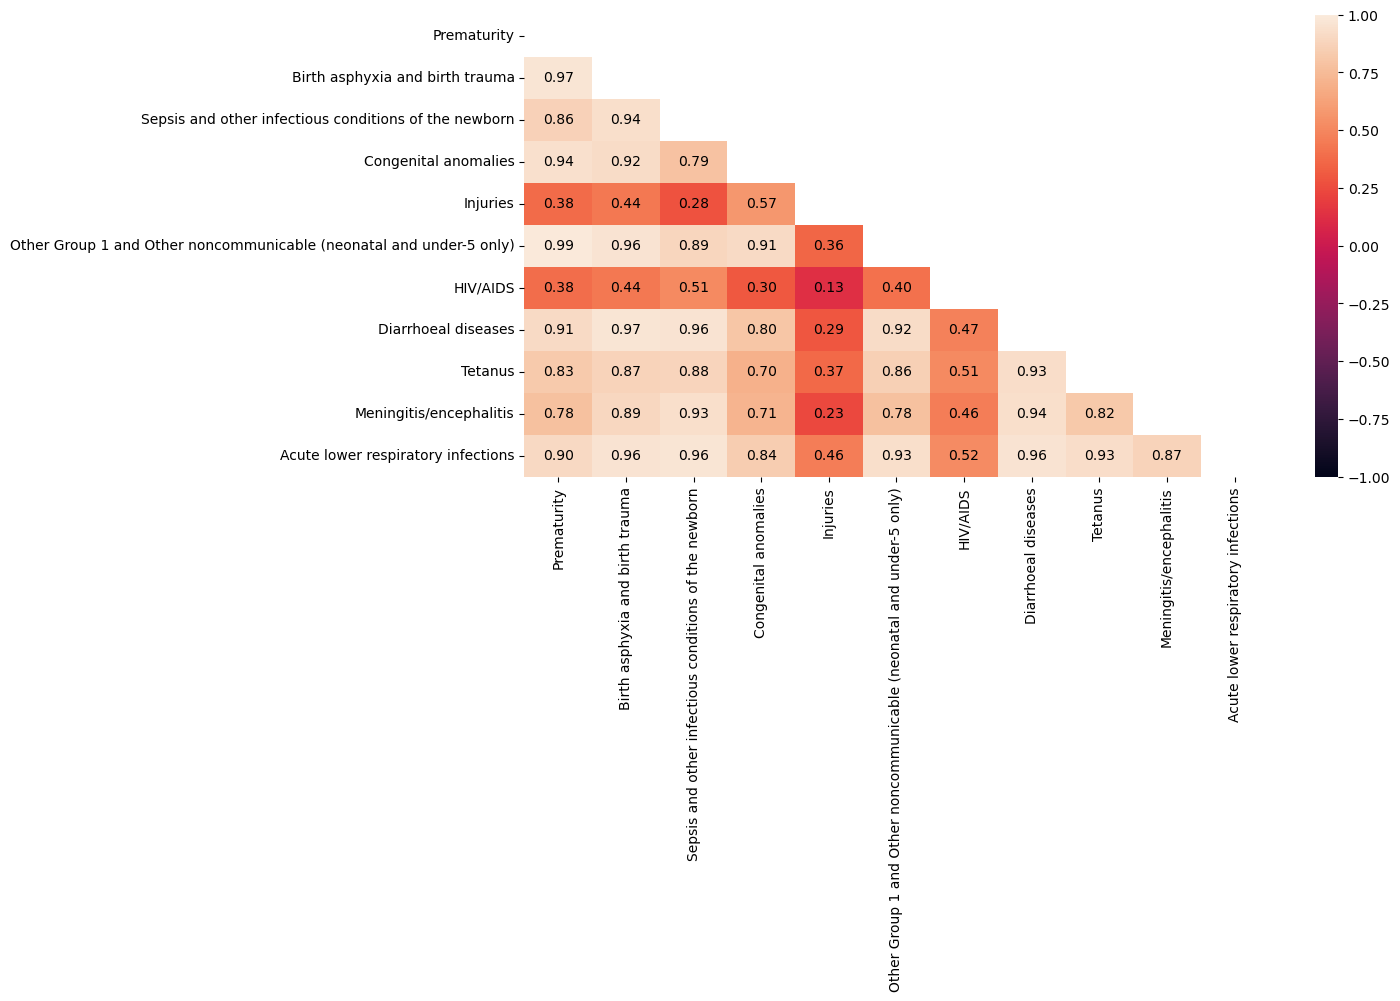

In [32]:

# Ma trận hệ số tương quan
corr_matrix = df_copy.corr()

# Tam giác dưới không lấy đường chéo của ma trận hệ số tương quan
corr_values = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype('bool'))

# vẽ biểu đồ heatmap
heatmap = sn.heatmap(corr_values, vmin=-1, vmax=1)
for i in range(len(corr_values)):
    for j in range(len(corr_values)):
        # Kiểm tra giá trị khác NaN
        if not pd.isna(corr_values.iloc[i, j]):
            heatmap.text(j+0.5, i+0.5, '{:.2f}'.format(corr_values.iloc[i, j]), ha='center', va='center', color='black')

plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.show()


In [33]:
high_corr = []
threshold = 0.9
for i in range(len(corr_values)):
  for j in range(len(corr_values)):
    if i != j and abs(corr_values.iloc[i, j]) > threshold:
      high_corr.append((corr_values.iloc[i, j], df_copy.columns[i], df_copy.columns[j]))

# In ra các cặp biến có hệ số tương quan lớn hơn ngưỡng đặt trước
for corr, col1, col2 in high_corr:
  print(f"{col1} và {col2} có hệ số tương quan là {corr:.2f}")

Birth asphyxia and birth trauma và Prematurity có hệ số tương quan là 0.97
Sepsis and other infectious conditions of the newborn và Birth asphyxia and birth trauma có hệ số tương quan là 0.94
Congenital anomalies và Prematurity có hệ số tương quan là 0.94
Congenital anomalies và Birth asphyxia and birth trauma có hệ số tương quan là 0.92
Other Group 1 and Other noncommunicable (neonatal and under-5 only) và Prematurity có hệ số tương quan là 0.99
Other Group 1 and Other noncommunicable (neonatal and under-5 only) và Birth asphyxia and birth trauma có hệ số tương quan là 0.96
Other Group 1 and Other noncommunicable (neonatal and under-5 only) và Congenital anomalies có hệ số tương quan là 0.91
Diarrhoeal diseases và Prematurity có hệ số tương quan là 0.91
Diarrhoeal diseases và Birth asphyxia and birth trauma có hệ số tương quan là 0.97
Diarrhoeal diseases và Sepsis and other infectious conditions of the newborn có hệ số tương quan là 0.96
Diarrhoeal diseases và Other Group 1 and Other 

## 3. Dữ liệu đa biến (Multivariate)

In [34]:
# Lấy các nhóm thuộc tính có hệ số tương quan cao
group_corr = {}
for corr, col1, col2 in high_corr:
  if col1 not in group_corr:
    group_corr[col1] = []
  group_corr[col1].append(col2)

# In ra các nhóm thuộc tính có hệ số tương quan cao
for group in group_corr.keys():
    print(f"Nhóm thuộc tính: ")
    print(f"\t{group}")
    for col in group_corr[group]:
        print(f"\t{col}")

Nhóm thuộc tính: 
	Birth asphyxia and birth trauma
	Prematurity
Nhóm thuộc tính: 
	Sepsis and other infectious conditions of the newborn
	Birth asphyxia and birth trauma
Nhóm thuộc tính: 
	Congenital anomalies
	Prematurity
	Birth asphyxia and birth trauma
Nhóm thuộc tính: 
	Other Group 1 and Other noncommunicable (neonatal and under-5 only)
	Prematurity
	Birth asphyxia and birth trauma
	Congenital anomalies
Nhóm thuộc tính: 
	Diarrhoeal diseases
	Prematurity
	Birth asphyxia and birth trauma
	Sepsis and other infectious conditions of the newborn
	Other Group 1 and Other noncommunicable (neonatal and under-5 only)
Nhóm thuộc tính: 
	Tetanus
	Diarrhoeal diseases
Nhóm thuộc tính: 
	Meningitis/encephalitis
	Sepsis and other infectious conditions of the newborn
	Diarrhoeal diseases
Nhóm thuộc tính: 
	Acute lower respiratory infections
	Prematurity
	Birth asphyxia and birth trauma
	Sepsis and other infectious conditions of the newborn
	Other Group 1 and Other noncommunicable (neonatal and und